# YOLOv5

이 노트북은 Colab에서 YOLOv5s 모델을 VOC dataset으로 훈련하는 예제입니다.


PASCAL VOC Dataset을 다운로드 받은 후 압축을 풀어줍니다.

안되는 코드

In [ ]:
# # url에서 파일 다운로드
# !wget http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar # PASCAL VOC 데이터셋 다운로드
# !tar -xf VOCtrainval_11-May-2012.tar # 다운로드한 tar 파일 압축 풀기
# !rm VOCtrainval_11-May-2012.tar # 원본 압축 파일 제거

되는 코드

In [1]:
# 구글 드라이브 파일 다운로드
!pip install gdown
!gdown 1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB
!tar -xf VOCtrainval_11-May-2012.tar
!rm VOCtrainval_11-May-2012.tar

Downloading...
From (original): https://drive.google.com/uc?id=1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB
From (redirected): https://drive.google.com/uc?id=1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB&confirm=t&uuid=0c5644a4-e471-4c5e-9408-49e9960482df
To: /content/VOCtrainval_11-May-2012.tar
100% 2.00G/2.00G [00:16<00:00, 124MB/s]


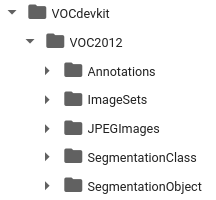

실습하고 있는 데이터셋은 라벨링이 xml 파일 포맷으로 제공되며, 해당 포맷은 YOLOv5을 활용해 객체 인식 신경망을 훈련할 때 사용할 수 있는 파일 포맷이 아닙니다.

convert2Yolo라고 하는 깃허브 저장소에서 Pascal VOC 데이터셋의 xml 파일 형태를 YOLOv5를 통한 훈련에 사용할 수 있도록 변환하는 기능을 제공합니다. 이를 활용해 xml 파일 포맷을 txt 파일 포맷으로 변환하겠습니다.

이 과정에 앞서 다음과 같이 Pascal VOC 데이터셋의 클래스 리스트가 있는 파일을 생성합니다.

In [2]:
# PASCAL VOC 데이터셋 클래스 이름을 리스트로 정의
classes = ["aeroplane\n", "bicycle\n", "bird\n", "boat\n", "bottle\n",
           "bus\n", "car\n", "cat\n", "chair\n", "cow\n", "diningtable\n",
           "dog\n", "horse\n", "motorbike\n", "person\n", "pottedplant\n",
           "sheep\n", "sofa\n", "train\n", "tvmonitor"]

# 'vocnames.txt'라는 파일을 쓰기 모드('w')로 열기
# 이 파일이 없으면 생성되고, 있으면 기존 내용을 덮어씁니다.
with open("vocnames.txt", 'w') as f:
    # 클래스 이름 리스트를 텍스트 파일에 한 줄씩 쓰기
    f.writelines(classes)

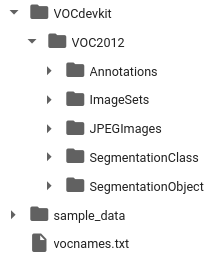

vocnames.txt 파일이 생성된 것을 확인한 후 다음과 같이 VOCdevkit/VOC2012 폴더 아래에 labels 폴더를 생성한 후 convert2Yolo 저장소를 활용해 xml 파일을 txt 파일로 변환합니다

In [3]:
# # convert2Yolo라는 GitHub 저장소를 클론(복제)합니다.
# !git clone https://github.com/ssaru/convert2Yolo.git
# # 클론한 저장소 디렉토리로 이동한 후, example.py 스크립트를 실행하여 VOC 데이터셋을 YOLO 형식으로 변환
# !cd convert2Yolo && python3 example.py --datasets VOC \
# # VOC 데이터셋에서 이미지를 가져올 경로를 지정
# --img_path ../VOCdevkit/VOC2012/JPEGImages/ \
# # VOC 데이터셋에서 라벨 파일(xml)을 가져올 경로를 지정
# --label ../VOCdevkit/VOC2012/Annotations/ \
# # 변환된 YOLO 형식의 라벨을 저장할 경로를 지정
# --convert_output_path ../VOCdevkit/VOC2012/JPEGImages/ \
# # 처리할 이미지 파일의 확장자를 지정
# --img_type ".jpg" \
# # 변환에 대한 메타데이터를 저장할 manifest 파일을 저장할 경로를 지정 ; 이미지 저장 경로
# --manifest_path ../ \
# # 클래스 목록이 담긴 파일(vocnames.txt)의 경로를 지정
# # 이 파일에는 변환할 VOC 데이터셋의 클래스들이 정의되어 있음
# --cls_list_file ../vocnames.txt

!git clone https://github.com/ssaru/convert2Yolo.git
!cd convert2Yolo && python3 example.py --datasets VOC \
--img_path ../VOCdevkit/VOC2012/JPEGImages/ \
--label ../VOCdevkit/VOC2012/Annotations/ \
--convert_output_path ../VOCdevkit/VOC2012/JPEGImages/ \
--img_type ".jpg" \
--manifest_path ../ \
--cls_list_file ../vocnames.txt

Cloning into 'convert2Yolo'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 215 (delta 38), reused 35 (delta 35), pack-reused 172 (from 1)
Receiving objects: 100% (215/215), 994.67 KiB | 10.47 MiB/s, done.
Resolving deltas: 100% (95/95), done.

VOC Parsing:   |████████████████████████████████████████| 100.0% (17125/17125)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (17125/17125)  Complete


YOLO Saving:   |████████████████████████████████████████| 100.0% (17125/17125)  Complete



다운로드 완료 후 훈련을 위한 이미지가 있는 폴더의 경로는 아래와 같습니다.

/content/VOCdevkit/VOC2012/JPEGImages/

YOLOv5를 통한 객체 인식 신경망을 훈련하기 위해 각 이미지 내 객체의 위치가 라벨링되어 있는 텍스트 파일은 이미지와 같은 폴더에 있습니다.

YOLOv5에서 훈련할 때 이미지와 같은 경로에 이미지와 동일한 이름의 라벨링 된 텍스트 파일이 있어야만 훈련을 수행할 수 있습니다. 구체적인 파일 구조는 아래와 같습니다.


```
$Object_Detection_Dataset/
                         ┗ 1.png
                         ┗ 1.txt
                         ┗ 2.jpg
                         ┗ 2.txt

```

이제 데이터를 훈련 데이터와 검증 데이터로 나누겠습니다.

In [4]:
import os
import shutil
from tqdm import tqdm

# 디렉토리 생성
# 데이터셋이 있는 폴더 경로
data_root = "/content/VOCData"
# val, train 데이터 디렉토리 정의
val_root = os.path.join(data_root, "val") # /content/VOCData/val
train_root = os.path.join(data_root, "train") # /content/VOCData/train
# val, train 디렉토리 없으면 생성
os.makedirs(val_root, exist_ok=True)
os.makedirs(train_root, exist_ok=True)

# 이미지 파일 경로 목록이 저장된 파일 열기
with open("/content/manifest.txt") as f:
    files = f.readlines() # 경로를 리스트로 읽어들임

# 파일 목록 순회하며 처리
for idx, img_path in tqdm(enumerate(files)):
    # /content/VOCdevkit/VOC2012/JPEGImages/2011_006380.jpg\n
    # img_src = "/content/VOCdevkit/VOC2012/JPEGImages/2011_006380.jpg"
    img_src = img_path.split('\n')[0] # 각 경로 문자열 끝에 있는 개행 문자 제거

    # splitext: 파일 경로를 확장자와 나머지 부분으로 나눔 -> 튜플로 반환
    # ("/content/VOCdevkit/VOC2012/JPEGImages/2011_006380", ".jpg")
    # /content/VOCdevkit/VOC2012/JPEGImages/2011_006380.txt
    txt_src = os.path.splitext(img_src)[0] + ".txt"

    # ("/content/VOCdevkit/VOC2012/JPEGImages", "2011_006380.jpg")
    # "2011_006380.jpg" 파일 이름만 추출
    img_name = os.path.split(img_src)[-1]

    # "2011_006380.txt" 파일 이름만 추출
    text_name = os.path.split(txt_src)[-1]

    # 경로 설정
    # 데이터의 30%를 검증 데이터셋으로 사용
    if idx % 10 < 3:
        img_dst = os.path.join(val_root, img_name) # 이미지 파일 경로
        text_dst = os.path.join(val_root, text_name) # 텍스트 파일 경로
    # 나머지 70%는 훈련 데이터셋으로 사용
    else:
        img_dst = os.path.join(train_root, img_name)
        text_dst = os.path.join(train_root, text_name)

    # 이미지 파일을 설정한 경로로 복사
    shutil.copy2(img_src, img_dst)
    # 텍스트 파일을 설정한 경로로 복사
    shutil.copy2(txt_src, text_dst)

17125it [00:31, 552.32it/s]


이제 YOLOv5를 VOC dataset으로 훈련하도록 하겠습니다.

학습을 위해 YOLOv5 환경을 구성하도록 하겠습니다.

In [5]:
# YOLOv5 GitHub 저장소에서 복사
!git clone -b v7.0 https://github.com/jetsonai/yolov5
%cd yolov5
# 필요한 패키지 설치
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 15656, done.
remote: Total 15656 (delta 0), reused 0 (delta 0), pack-reused 15656 (from 1)
Receiving objects: 100% (15656/15656), 14.50 MiB | 22.35 MiB/s, done.
Resolving deltas: 100% (10701/10701), done.
Note: switching to '915bbf294bb74c859f0b41f1c23bc395014ea679'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s

In [6]:
!pwd

/content/yolov5


훈련에 앞서 YOLOv5로 추론을 할 수 있는 환경인지 테스트해봅니다.

검출은 아래와 같은 방식으로 할 수 있습니다.
```
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

아래의 스크립트가 에러 없이 수행된다면 훈련할 준비가 되었습니다.

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-0-g915bbf2 Python-3.10.12 torch-2.4.1+cu121 CPU

100% 14.1M/14.1M [00:00<00:00, 129MB/s]

/content/yolov5/models/experimental.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` wi

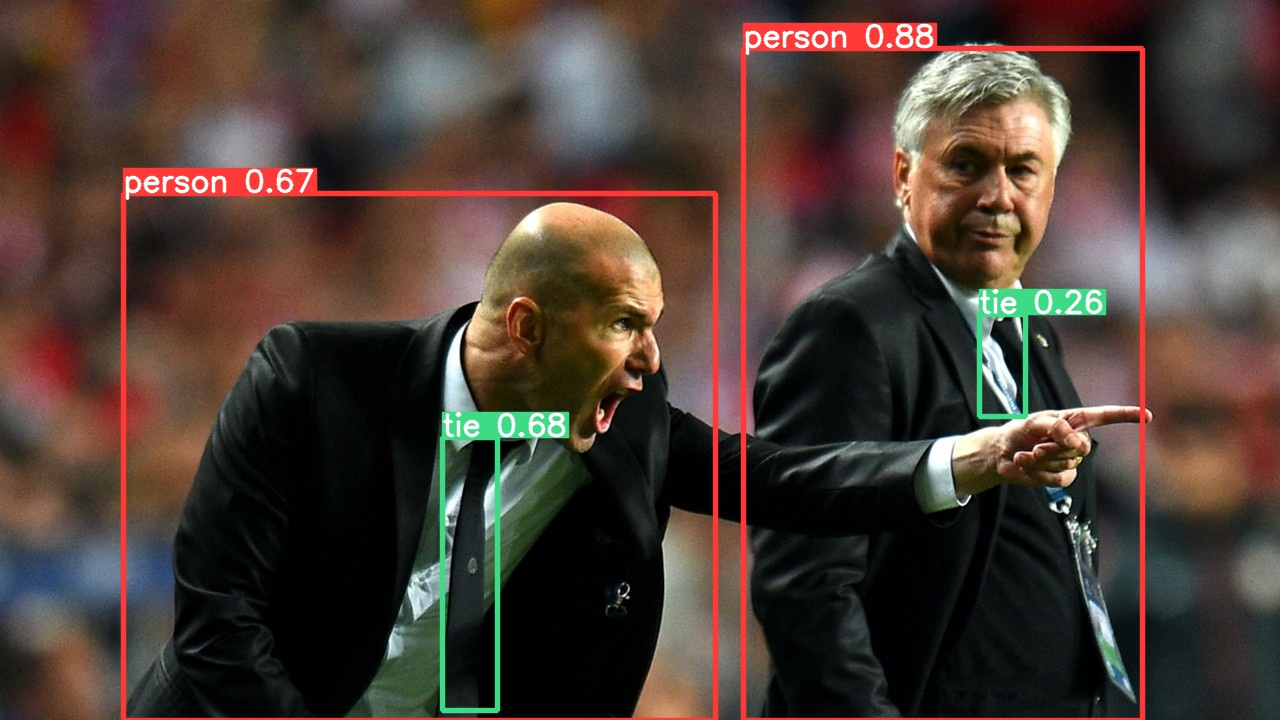

In [7]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread('runs/detect/exp/zidane.jpg'))

이제 훈련을 위한 설정 파일을 준비합니다.

YOLOv5에는 기본적으로 VOC 데이터셋을 훈련하기 위한 VOC.yaml파일이 있습니다만, 저희는 별도로 yaml파일을 제작합니다.

내용은 아래와 같습니다.

YOLOv5는 darknet을 사용하는 이전의 YOLOv4와는 다르게 데이터셋이 있는 폴더 경로를 입력하여서 훈련에 사용할 수 있습니다.

```
train:
  - /content/VOCData/train
val:
  - /content/VOCData/val

# Classes
names:
  0: aeroplane
  1: bicycle
  2: bird
  3: boat
  4: bottle
  5: bus
  6: car
  7: cat
  8: chair
  9: cow
  10: diningtable
  11: dog
  12: horse
  13: motorbike
  14: person
  15: pottedplant
  16: sheep
  17: sofa
  18: train
  19: tvmonitor
```



In [8]:
text_lines = '''
train:
  - /content/VOCData/train
val:
  - /content/VOCData/val

# Classes
names:
  0: aeroplane
  1: bicycle
  2: bird
  3: boat
  4: bottle
  5: bus
  6: car
  7: cat
  8: chair
  9: cow
  10: diningtable
  11: dog
  12: horse
  13: motorbike
  14: person
  15: pottedplant
  16: sheep
  17: sofa
  18: train
  19: tvmonitor
'''
with open("/content/yolov5/vocdata.yaml", 'w') as f:
    f.write(text_lines)

이제 훈련을 수행하겠습니다.

In [ ]:
!python train.py --img 480 --batch 16 --epochs 20 --data vocdata.yaml --weights yolov5s.pt --cache

2024-09-16 13:22:51.761153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-16 13:22:51.782458: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-16 13:22:51.788414: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-16 13:22:51.802766: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-16 13:22:53.006957: W tensorflow/compiler/tf2

훈련이 완료되면 weight 파일을 다운로드합니다.

In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# YOLOv7

이 노트북은 Colab에서 YOLOv7-tiny 모델을 VOC dataset으로 훈련하는 예제입니다.

PASCAL VOC Dataset을 다운로드 받은 후 압축을 풀어줍니다.

In [ ]:
!pip install gdown
!gdown 1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB
!tar -xf VOCtrainval_11-May-2012.tar
!rm VOCtrainval_11-May-2012.tar

Downloading...
From (original): https://drive.google.com/uc?id=1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB
From (redirected): https://drive.google.com/uc?id=1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB&confirm=t&uuid=3d4f16b7-9d63-4c81-9cf6-a1ad7f2e1952
To: /content/VOCtrainval_11-May-2012.tar
100% 2.00G/2.00G [00:33<00:00, 59.9MB/s]


실습하고 있는 데이터셋은 라벨링이 xml 파일 포맷으로 제공되며, 해당 포맷은 YOLOv7을 활용해 객체 인식 신경망을 훈련할 때 사용할 수 있는 파일 포맷이 아닙니다.

convert2Yolo라고 하는 깃허브 저장소에서 Pascal VOC 데이터셋의 xml 파일 형태를 YOLOv7를 통한 훈련에 사용할 수 있도록 변환하는 기능을 제공합니다. 이를 활용해 xml 파일 포맷을 txt 파일 포맷으로 변환하겠습니다.

이 과정에 앞서 다음과 같이 Pascal VOC 데이터셋의 클래스 리스트가 있는 파일을 생성합니다.

In [ ]:
classes = ["aeroplane\n", "bicycle\n", "bird\n", "boat\n", "bottle\n",
           "bus\n", "car\n", "cat\n", "chair\n", "cow\n", "diningtable\n",
           "dog\n", "horse\n", "motorbike\n", "person\n", "pottedplant\n",
           "sheep\n", "sofa\n", "train\n", "tvmonitor"]
with open("vocnames.txt", 'w') as f:
    f.writelines(classes)

vocnames.txt 파일이 생성된 것을 확인한 후 다음과 같이 VOCdevkit/VOC2012 폴더 아래에 labels 폴더를 생성한 후 convert2Yolo 저장소를 활용해 xml 파일을 txt 파일로 변환합니다

In [ ]:
!git clone https://github.com/ssaru/convert2Yolo.git
!cd convert2Yolo && python3 example.py --datasets VOC \
--img_path ../VOCdevkit/VOC2012/JPEGImages/ \
--label ../VOCdevkit/VOC2012/Annotations/ \
--convert_output_path ../VOCdevkit/VOC2012/JPEGImages/ \
--img_type ".jpg" \
--manifest_path ../ \
--cls_list_file ../vocnames.txt

Cloning into 'convert2Yolo'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 215 (delta 38), reused 35 (delta 35), pack-reused 172 (from 1)
Receiving objects: 100% (215/215), 994.67 KiB | 13.09 MiB/s, done.
Resolving deltas: 100% (95/95), done.

VOC Parsing:   |████████████████████████████████████████| 100.0% (17125/17125)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (17125/17125)  Complete


YOLO Saving:   |████████████████████████████████████████| 100.0% (17125/17125)  Complete



다운로드 완료 후 훈련을 위한 이미지가 있는 폴더의 경로는 아래와 같습니다.

/content/VOCdevkit/VOC2012/JPEGImages/

YOLOv7를 통한 객체 인식 신경망을 훈련하기 위해 각 이미지 내 객체의 위치가 라벨링되어 있는 텍스트 파일은 이미지와 같은 폴더에 있습니다.

YOLOv7에서 훈련할 때 이미지와 같은 경로에 이미지와 동일한 이름의 라벨링 된 텍스트 파일이 있어야만 훈련을 수행할 수 있습니다. 구체적인 파일 구조는 아래와 같습니다.


```
$Object_Detection_Dataset/
                         ┗ 1.png
                         ┗ 1.txt
                         ┗ 2.jpg
                         ┗ 2.txt

```

이제 데이터를 훈련 데이터와 검증 데이터로 나누겠습니다.

In [ ]:
import os
import shutil
from tqdm import tqdm
data_root = "/content/VOCData"
val_root = os.path.join(data_root, "val")
train_root = os.path.join(data_root, "train")
os.makedirs(val_root, exist_ok=True)
os.makedirs(train_root, exist_ok=True)

with open("/content/manifest.txt") as f:
    files = f.readlines()

for idx, img_path in tqdm(enumerate(files)):
    img_src = img_path.split('\n')[0]
    txt_src = os.path.splitext(img_src)[0] + ".txt"
    img_name = os.path.split(img_src)[-1]
    text_name = os.path.split(txt_src)[-1]
    if idx % 10 < 3:
        img_dst = os.path.join(val_root, img_name)
        text_dst = os.path.join(val_root, text_name)
    else:
        img_dst = os.path.join(train_root, img_name)
        text_dst = os.path.join(train_root, text_name)
    shutil.copy2(img_src, img_dst)
    shutil.copy2(txt_src, text_dst)

17125it [00:09, 1717.64it/s]


# 여기까진 YOLOv5와 완전히 동일한 과정(데이터셋 준비)

# 달라지는 부분

이제 YOLOv7-tiny를 VOC dataset으로 훈련하도록 하겠습니다.

학습을 위해 YOLOv7 환경을 구성하도록 하겠습니다.

In [ ]:
%pip uninstall numpy
%pip install numpy==1.24.4

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.23.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.23.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 85.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.24.4 which is incompatible.


In [9]:
!git clone https://github.com/WongKinYiu/yolov7 # YOLOv7 모델과 관련된 코드, 모델 가중치, 데이터셋 등 복사
# yolov7 디렉토리로 이동
%cd yolov7
%pip install -qr requirements.txt  # 필수 패키지 설치

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 26.16 MiB/s, done.
Resolving deltas: 100% (520/520), done.
/content/yolov5/yolov7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.16 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.17.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.23.5 which is incomp

In [10]:
import shutil
shutil.move('/content/yolov5/yolov7', '/content/yolov7')

'/content/yolov7'



```
# 코드로 형식 지정됨
```

훈련에 앞서 YOLOv5로 추론을 할 수 있는 환경인지 테스트해봅니다.

검출은 아래와 같은 방식으로 할 수 있습니다.
```
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

아래의 스크립트가 에러 없이 수행된다면 훈련할 준비가 되었습니다.

Namespace(weights=['yolov7-tiny.pt'], source='inference/images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.4.0+cu121 CPU

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are expli

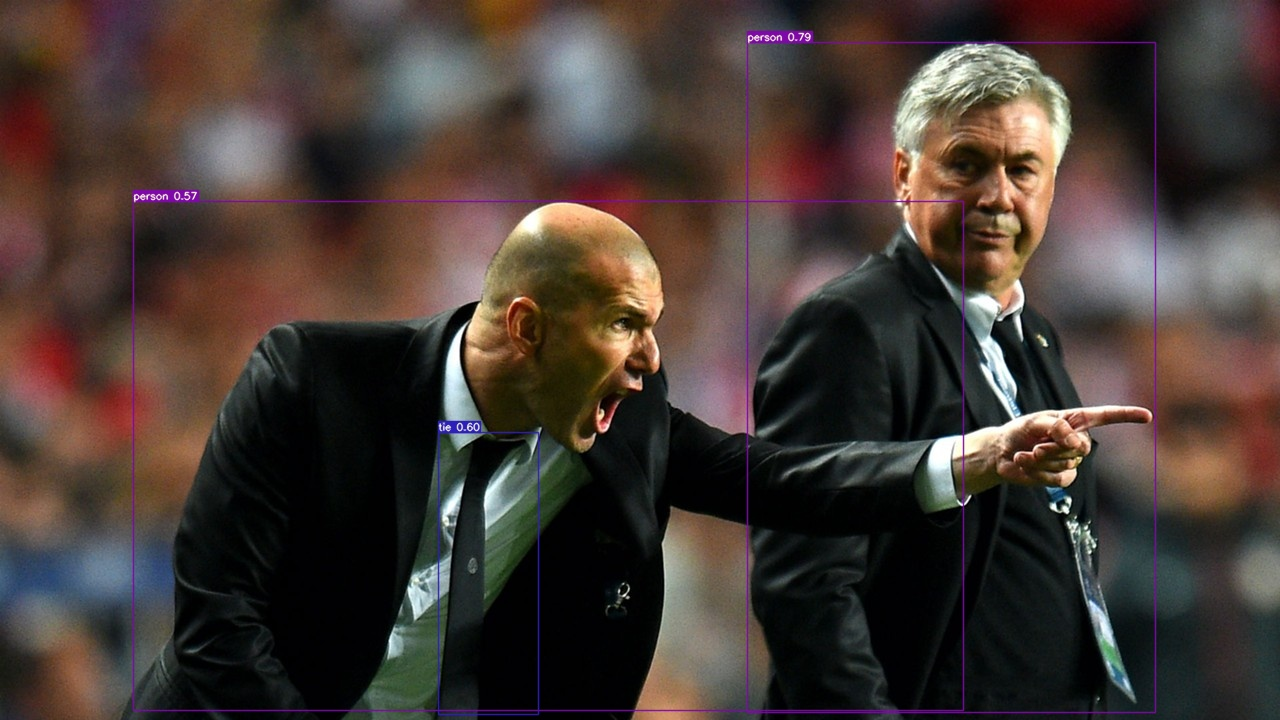

In [ ]:
!python detect.py --weights yolov7-tiny.pt --img 640 --conf 0.25 --source inference/images
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread('runs/detect/exp/zidane.jpg'))

이제 훈련을 위한 설정 파일을 준비합니다.
내용은 아래와 같습니다.

YOLOv7는 darknet을 사용하는 이전의 YOLOv4와는 다르게 데이터셋이 있는 폴더 경로를 입력하여서 훈련에 사용할 수 있습니다.

```
train:  /content/VOCData/train
val:  /content/VOCData/val

# number of classes
nc: 20

# class names
names: [ 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
         'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
         'dog', 'horse', 'motorbike', 'person', 'pottedplant',
         'sheep', 'sofa', 'train', 'tvmonitor' ]
```


In [11]:
text_lines = '''
train:  /content/VOCData/train
val:  /content/VOCData/val

# number of classes
nc: 20

# class names
names: [ 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
         'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
         'dog', 'horse', 'motorbike', 'person', 'pottedplant',
         'sheep', 'sofa', 'train', 'tvmonitor' ]
'''
with open("/content/yolov7/vocdata.yaml", 'w') as f:
    f.write(text_lines)

이제 훈련을 수행하겠습니다.

In [ ]:
!python train.py --img 320 --batch 8 --epochs 2 --data vocdata.yaml --weights yolov7-tiny.pt --cache

2024-09-18 08:44:48.954373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 08:44:49.322214: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 08:44:49.425117: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-18 08:44:49.836989: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-18 08:44:51.372642: W tensorflow/compiler/tf2

훈련이 완료되면 weight 파일을 다운로드합니다.

In [ ]:
from google.colab import files
files.download('/content/yolov7/runs/train/exp/weights/best.pt')

FileNotFoundError: Cannot find file: /content/yolov7/runs/train/exp/weights/best.pt